In [27]:
import os
print("Current Working Directory:", os.getcwd())
# load libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for plot
import missingno as msno # visualizing missing values
import warnings
%matplotlib inline
sns.set_palette('Oranges')
# turn off warnings for final notebook
warnings.filterwarnings('ignore')

Current Working Directory: c:\Users\monic\Desktop\Projects\github\ifood-mkt-analysis\Notebooks


In [28]:
# load dataset
cleaned_df = pd.read_csv('../dags/resources/data/silver/ifood_df_silver.csv')

In [3]:
cleaned_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'ZCostContact', 'ZRevenue', 'Response',
       'Age', 'CustomerDays', 'maritalDivorced', 'maritalMarried',
       'maritalSingle', 'maritalTogether', 'maritalWidow', 'education2nCycle',
       'educationBasic', 'educationGraduation', 'educationMaster',
       'educationPhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'Dependents', 'TotalPurchases', 'RScore', 'FScore', 'MScore',
       'RFMSegment', 'RFMScore', 'AgeGroup', 'IncomeGroup', 'Education',
       'MaritalStatus', 'PreferredChannel', 'isGraduated', 'isCouple',
       'hasChild', 'isSingleParenting', 'isChurn', 'SpenderGroup'],
      dt

# EDA (Exploratory Data Analysis)

## Features Correlation Analysis
Correlation Matrix
We have 
- Pearson correlation coefficient
- Kendall rank correlation coefficient
- Spearman’s rank correlation coefficient

<Axes: >

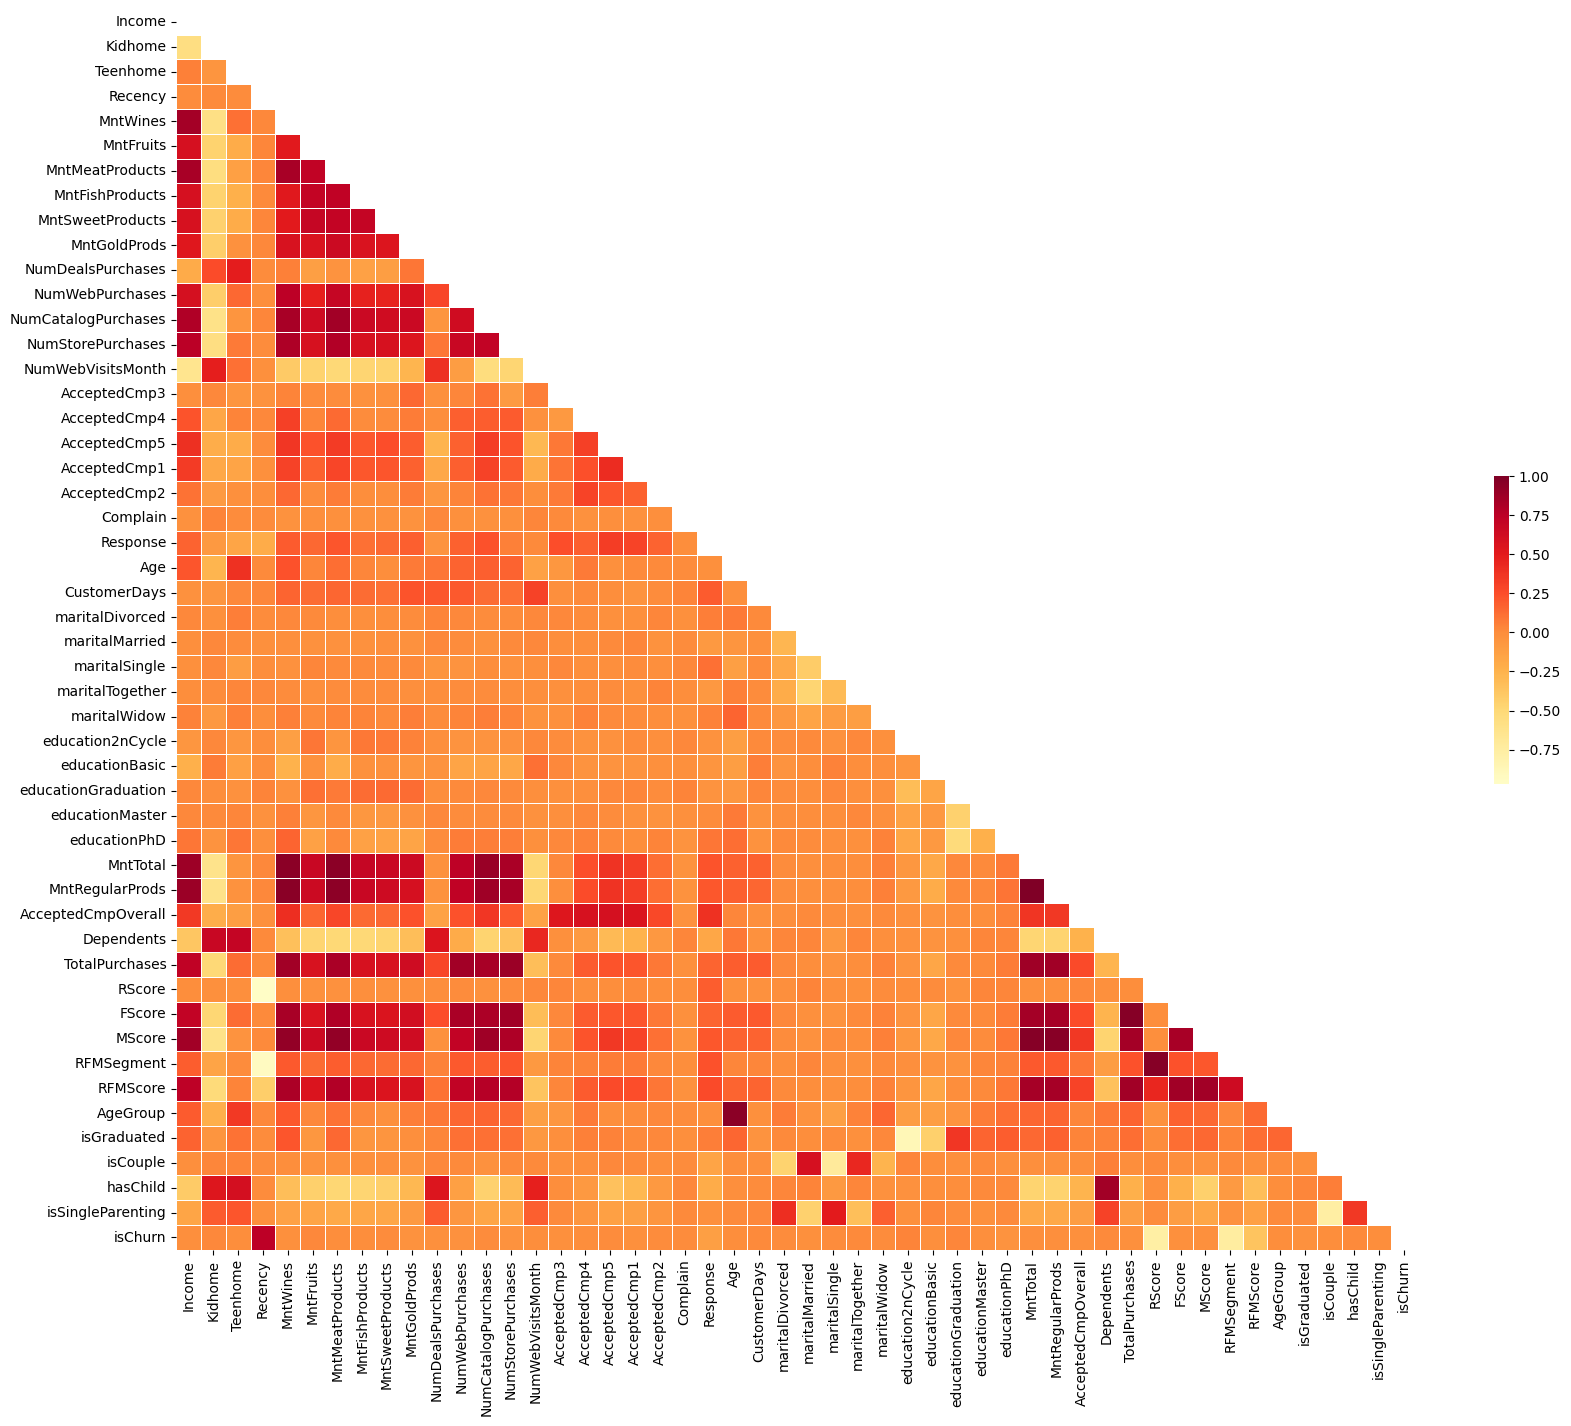

In [4]:
# Draw the heatmap with the mask and correct aspect ratio
corr = cleaned_df.drop(['ZCostContact', 'ZRevenue',"IncomeGroup", "Education", "MaritalStatus", "PreferredChannel", "SpenderGroup"], axis=1).corr(method='spearman')
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool_)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .2}, cmap='YlOrRd')

## Audience Segmentation


#### Distribution by Age Group


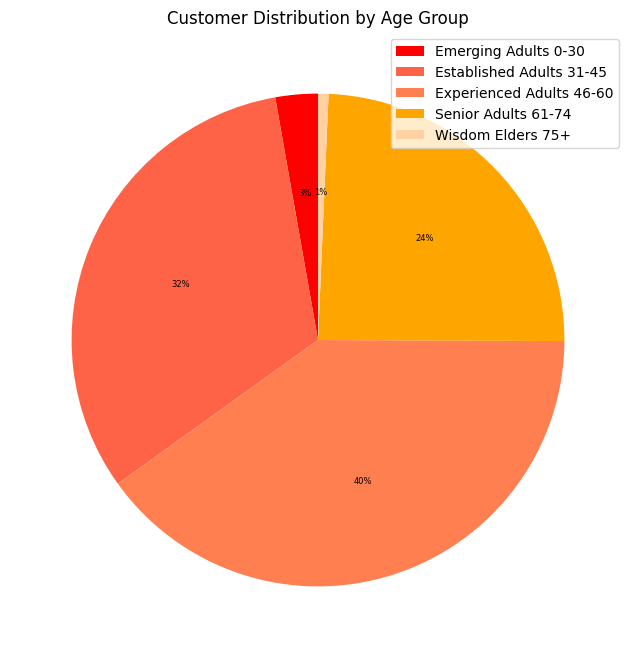

In [5]:
age_counts = cleaned_df['AgeGroup'].value_counts().sort_index()
orange_palette = [
    '#ff0000',  # Red for the lowest score
    '#ff6347',  # Tomato
    '#ff7f50',  # Coral
    '#ffa500',  # Orange
    '#ffd1a3'
]
age_group_labels = ['Emerging Adults 0-30', 'Established Adults 31-45', 'Experienced Adults 46-60', 'Senior Adults 61-74', 'Wisdom Elders 75+']

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
# age_counts.plot(kind='pie', labels=age_group_labels, autopct='%1.1f%%', startangle=90, colors=orange_palette)
patches, texts, autotexts = plt.pie(age_counts, startangle=90, autopct='%1.f%%', textprops={'fontsize': 6}, colors=orange_palette)
plt.title('Customer Distribution by Age Group')
plt.legend(patches, age_group_labels, loc='best')
plt.ylabel('')  # Pie chart does not need a y-label
plt.show()

#### Distribution by Education

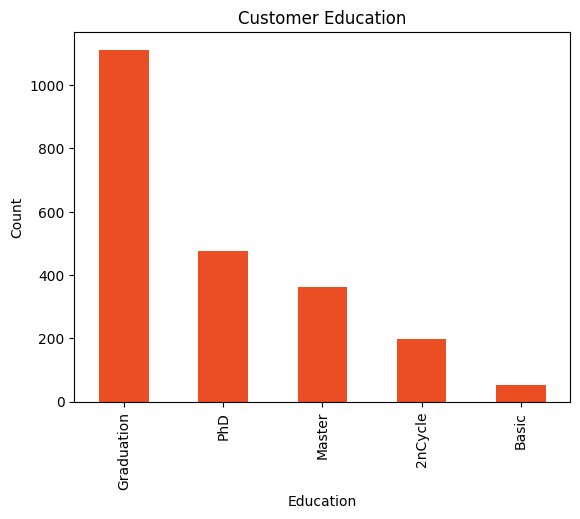

In [6]:
education_counts = cleaned_df['Education'].value_counts()
education_counts.plot(kind='bar', color='#EB4E23', title='Customer Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

#### Distribution by Marital Status

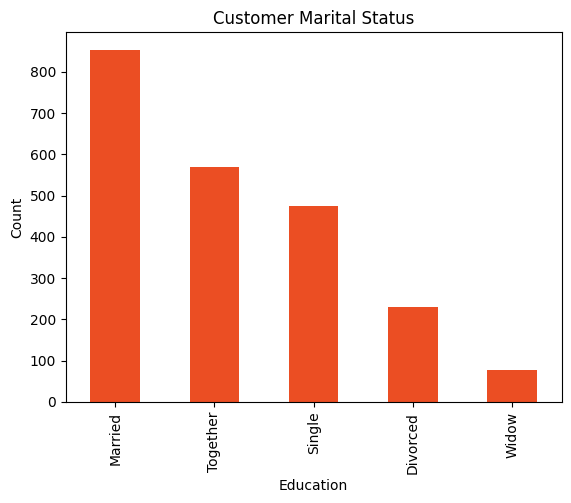

In [7]:
marital_counts = cleaned_df['MaritalStatus'].value_counts()
marital_counts.plot(kind='bar', color='#EB4E23', title='Customer Marital Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

#### Distribution by Income Group

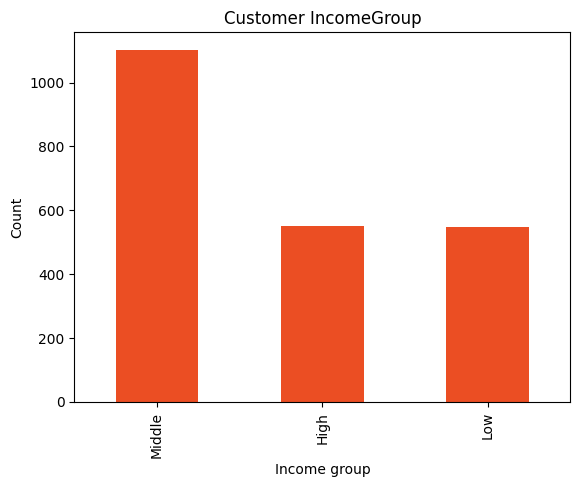

In [8]:
income_counts = cleaned_df['IncomeGroup'].value_counts()
income_counts.plot(kind='bar', color='#EB4E23', title='Customer IncomeGroup')
plt.xlabel('Income group')
plt.ylabel('Count')
plt.show()

#### Distribution by Preferred Channel

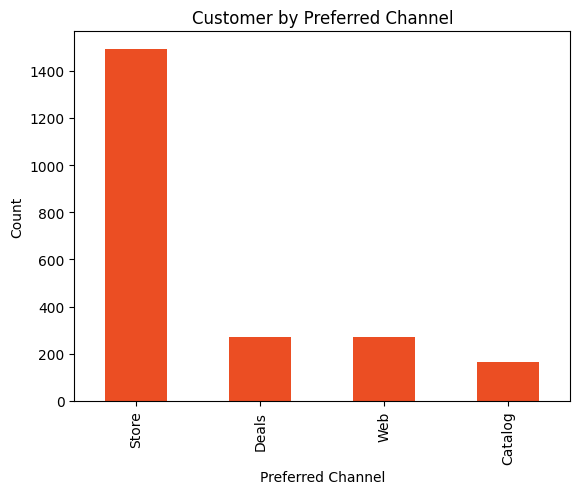

In [9]:
PreferredChannel_counts = cleaned_df['PreferredChannel'].value_counts()
PreferredChannel_counts.plot(kind='bar', color='#EB4E23', title='Customer by Preferred Channel')
plt.xlabel('Preferred Channel')
plt.ylabel('Count')
plt.show()

#### Mnt Total Distribution

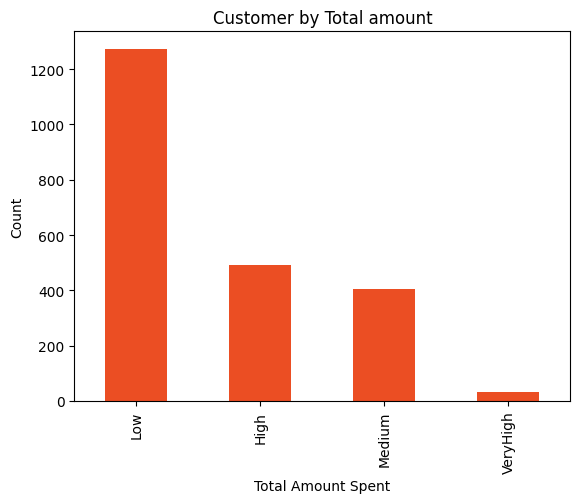

In [10]:
mount_total_counts = cleaned_df['SpenderGroup'].value_counts()
mount_total_counts.plot(kind='bar', color='#EB4E23', title='Customer by Total amount')
plt.xlabel('Total Amount Spent')
plt.ylabel('Count')
plt.show()

#### Distribution by RFM Segment

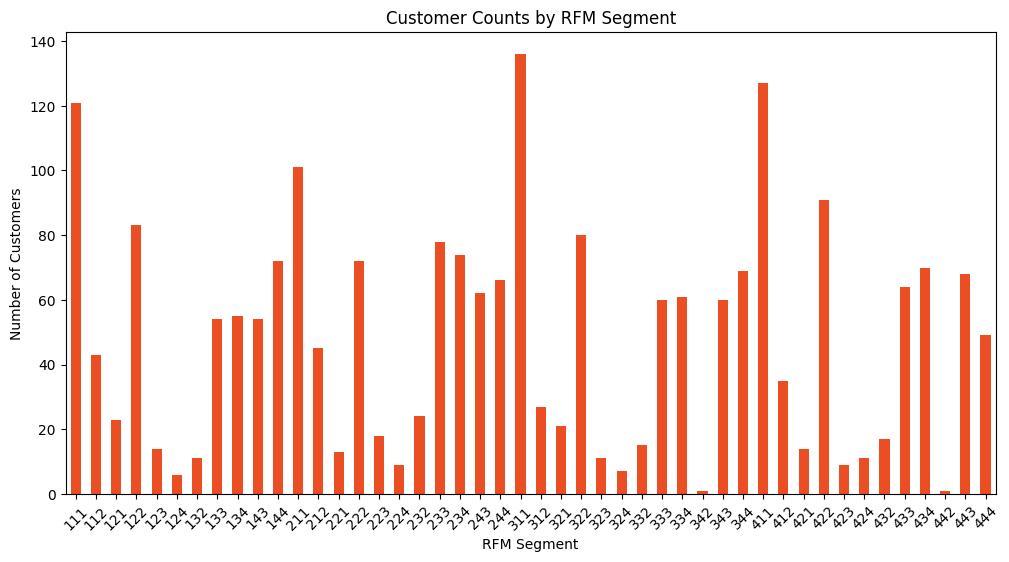

In [11]:
segment_counts = cleaned_df['RFMSegment'].value_counts().sort_index()
# Plotting the customer counts by RFM segment
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
segment_counts.plot(kind='bar', color='#EB4E23')
plt.title('Customer Counts by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

#### Distribution by RFM Score

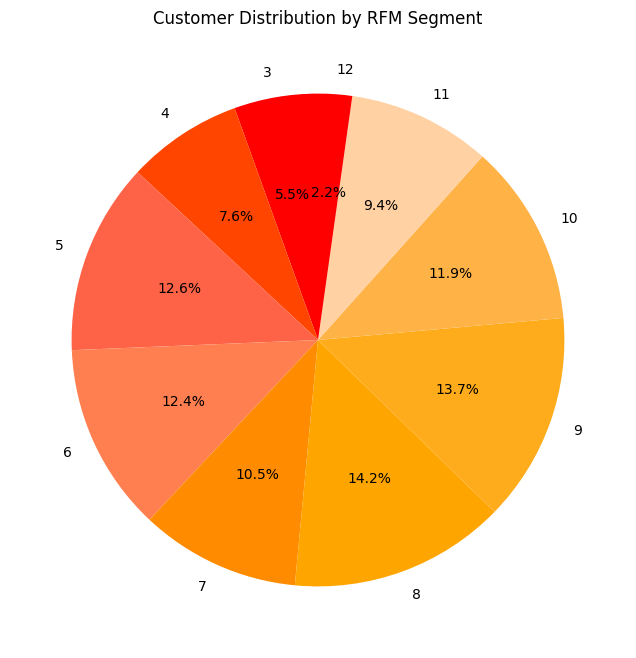

In [12]:
segment_score_counts = cleaned_df['RFMScore'].value_counts().sort_index()
orange_palette = [
    '#ff0000',  # Red for the lowest score
    '#ff4500',  # OrangeRed
    '#ff6347',  # Tomato
    '#ff7f50',  # Coral
    '#ff8c00',  # DarkOrange
    '#ffa500',  # Orange
    '#ffac1c',  # Goldish Orange
    '#ffb347',  # Lighter Orange
    '#ffd1a3'   # Very Light Orange, adjusted to be lighter
]

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
segment_score_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=orange_palette)
plt.title('Customer Distribution by RFM Segment')
plt.ylabel('')  # Pie charts don't require a y-label
plt.show()

## Campaigns

### How many customers have accepted our campaigns

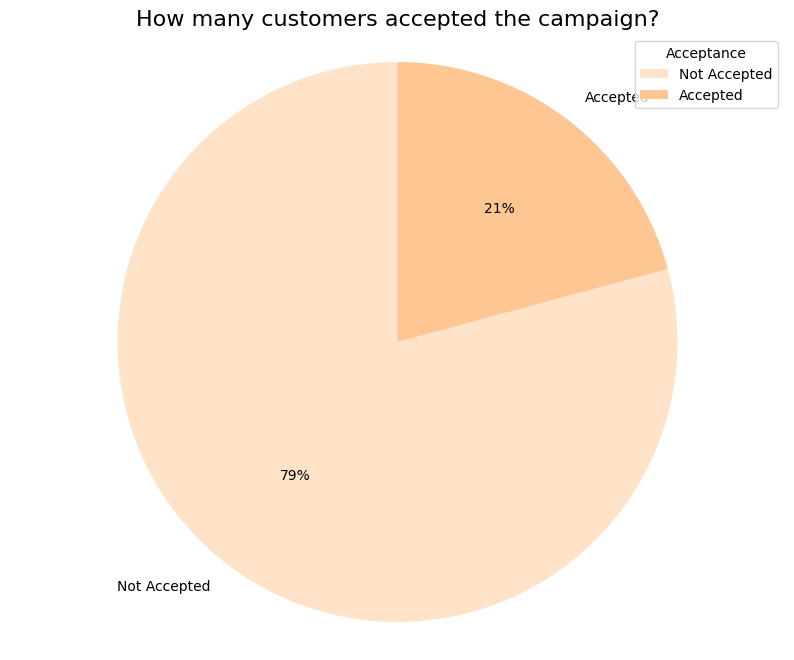

In [15]:
cleaned_df['is_accepted'] = cleaned_df['AcceptedCmpOverall'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

# Calculate value counts and labels
counts = cleaned_df['is_accepted'].value_counts()
labels = counts.index.tolist()

# Set the figure size using plt.subplots
fig, ax = plt.subplots(figsize=(10, 8))
# Set aspect ratio to be equal

# Create pie chart
ax.pie(counts, labels=labels, autopct='%.0f%%', colors=sns.color_palette('Oranges'), startangle=90)

# Set title and legend
ax.set_title('How many customers accepted the campaign?', fontsize=16)
ax.legend(title='Acceptance', loc='upper right')
ax.axis('equal')

# Display the pie chart
plt.show()

#### 79% of the customer did not accept any campaign

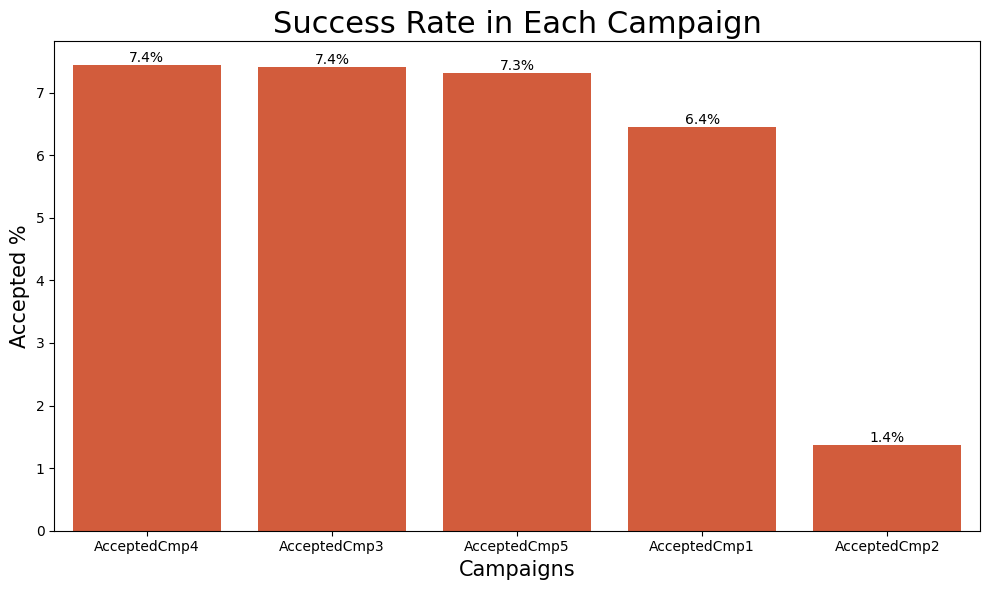

In [16]:
AcceptedCmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create a DataFrame to store the percentage of accepted campaigns
campaigns = pd.DataFrame(cleaned_df[AcceptedCmp].mean() * 100, columns=['Percent']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Percent', data=campaigns.sort_values('Percent', ascending=False), color="#EB4E23")

# Set labels and title
plt.xlabel('Campaigns', size=15)
plt.ylabel('Accepted %', size=15)
plt.title('Success Rate in Each Campaign', size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

The highest acceptance rate for an advertising campaign is the 4 campaign
The lowest acceptance rate for an advertising campaign is the second campaign (AcceptedCmp2)

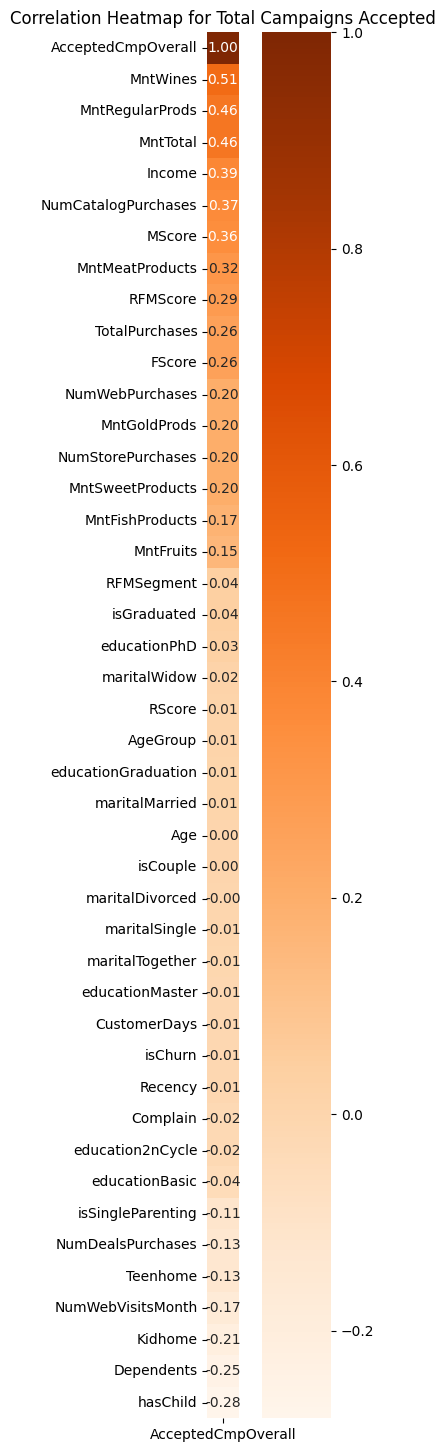

In [22]:
data_corr = cleaned_df.drop(columns=["IncomeGroup", "Education", "MaritalStatus", "PreferredChannel",'AcceptedCmp1', 'AcceptedCmp2'
              , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'ZCostContact', 'ZRevenue', "SpenderGroup", "is_accepted"]).corr()
column_corr = data_corr.loc['AcceptedCmpOverall']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='Oranges', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for Total Campaigns Accepted')
# Display the heatmap
plt.show()

## Mean Mnt Total by Accepted Campaigns

In [24]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_stats = []

for campaign in campaigns:
    # Filter customers who accepted the campaign
    accepted_customers = cleaned_df[cleaned_df[campaign] == 1]
    
    # Calculate mean, min, and max for MntTotal
    mean_value = accepted_customers['MntTotal'].mean()
    min_value = accepted_customers['MntTotal'].min()
    max_value = accepted_customers['MntTotal'].max()
    
    # Append the stats for the current campaign
    campaign_stats.append([campaign, mean_value, min_value, max_value])

# Convert the list to a DataFrame
campaign_stats_df = pd.DataFrame(campaign_stats, columns=['Campaign', 'Mean', 'Min', 'Max'])

# Display the DataFrame
print(campaign_stats_df)

       Campaign         Mean  Min   Max
0  AcceptedCmp1  1406.697183  255  2491
1  AcceptedCmp2  1241.266667   40  2056
2  AcceptedCmp3   653.601227    8  2491
3  AcceptedCmp4  1089.195122   51  2304
4  AcceptedCmp5  1538.447205  442  2491


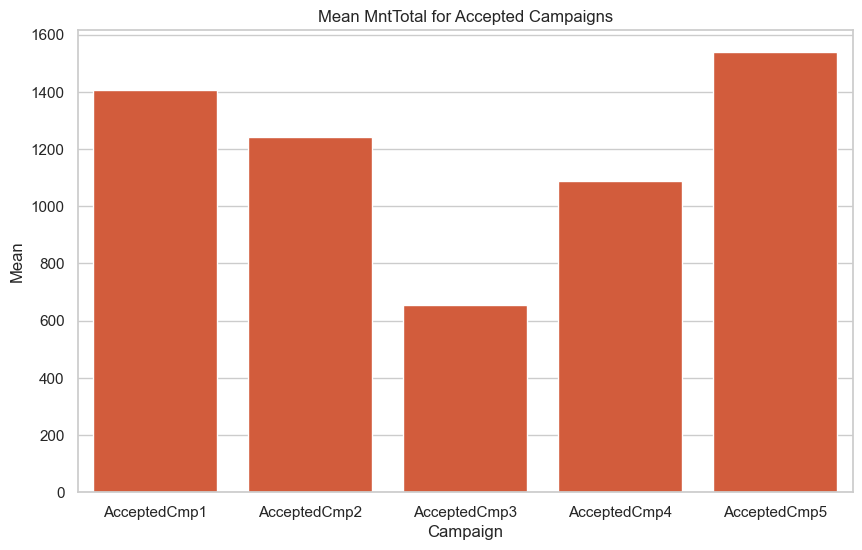

In [25]:
# Setting the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Example: Plotting mean values for each campaign
sns.barplot(x='Campaign', y='Mean', data=campaign_stats_df, color="#EB4E23")
plt.title('Mean MntTotal for Accepted Campaigns')
plt.show()

## Mean Income by Accepted Camapaigns

In [26]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_stats = []

for campaign in campaigns:
    # Filter customers who accepted the campaign
    accepted_customers = cleaned_df[cleaned_df[campaign] == 1]
    
    # Calculate mean, min, and max for MntTotal
    mean_value = accepted_customers['Income'].mean()
    min_value = accepted_customers['Income'].min()
    max_value = accepted_customers['Income'].max()
    
    # Append the stats for the current campaign
    campaign_stats.append([campaign, mean_value, min_value, max_value])

# Convert the list to a DataFrame
campaign_stats_df = pd.DataFrame(campaign_stats, columns=['Campaign', 'Mean', 'Min', 'Max'])

# Display the DataFrame
print(campaign_stats_df)

       Campaign          Mean      Min       Max
0  AcceptedCmp1  78872.626761  37929.0  105471.0
1  AcceptedCmp2  71054.833333  46015.0  102692.0
2  AcceptedCmp3  50802.582822   5648.0   96547.0
3  AcceptedCmp4  68663.231707  32144.0  102692.0
4  AcceptedCmp5  82345.503106  51563.0  105471.0


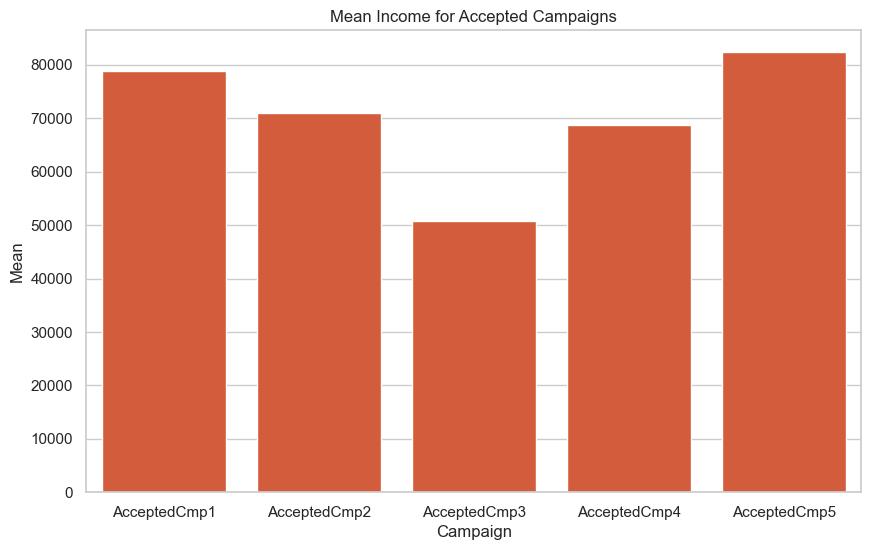

In [27]:
# Setting the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Example: Plotting mean values for each campaign
sns.barplot(x='Campaign', y='Mean', data=campaign_stats_df, color="#EB4E23")
plt.title('Mean Income for Accepted Campaigns')
plt.show()

## Mean MntWines by Accepted Campaigns

In [28]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_stats = []

for campaign in campaigns:
    # Filter customers who accepted the campaign
    accepted_customers = cleaned_df[cleaned_df[campaign] == 1]
    
    # Calculate mean, min, and max for MntTotal
    mean_value = accepted_customers['MntWines'].mean()
    min_value = accepted_customers['MntWines'].min()
    max_value = accepted_customers['MntWines'].max()
    
    # Append the stats for the current campaign
    campaign_stats.append([campaign, mean_value, min_value, max_value])

# Convert the list to a DataFrame
campaign_stats_df = pd.DataFrame(campaign_stats, columns=['Campaign', 'Mean', 'Min', 'Max'])

# Display the DataFrame
print(campaign_stats_df)

       Campaign        Mean  Min   Max
0  AcceptedCmp1  758.028169  152  1493
1  AcceptedCmp2  898.666667   38  1492
2  AcceptedCmp3  378.656442    0  1486
3  AcceptedCmp4  750.231707   41  1493
4  AcceptedCmp5  874.503106  152  1493


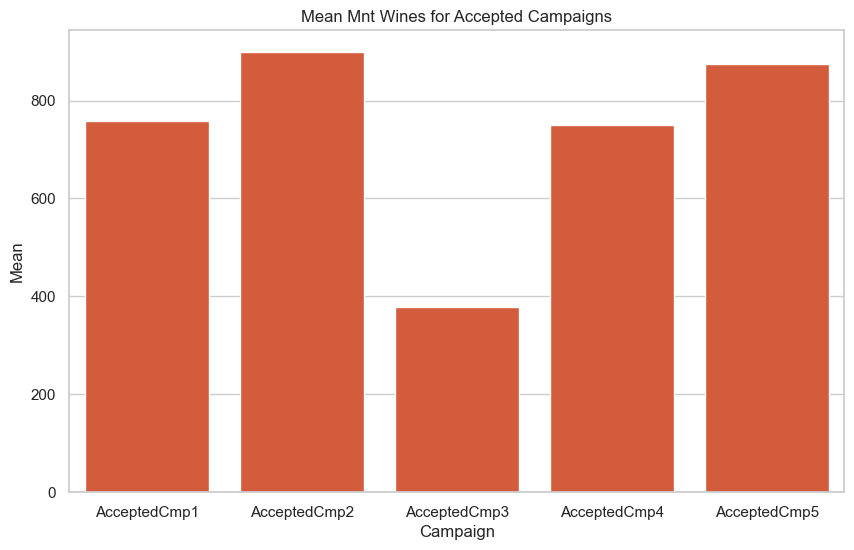

In [29]:
# Setting the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Example: Plotting mean values for each campaign
sns.barplot(x='Campaign', y='Mean', data=campaign_stats_df, color="#EB4E23")
plt.title('Mean Mnt Wines for Accepted Campaigns')
plt.show()

## Mean Recency by Accepted Campaigns

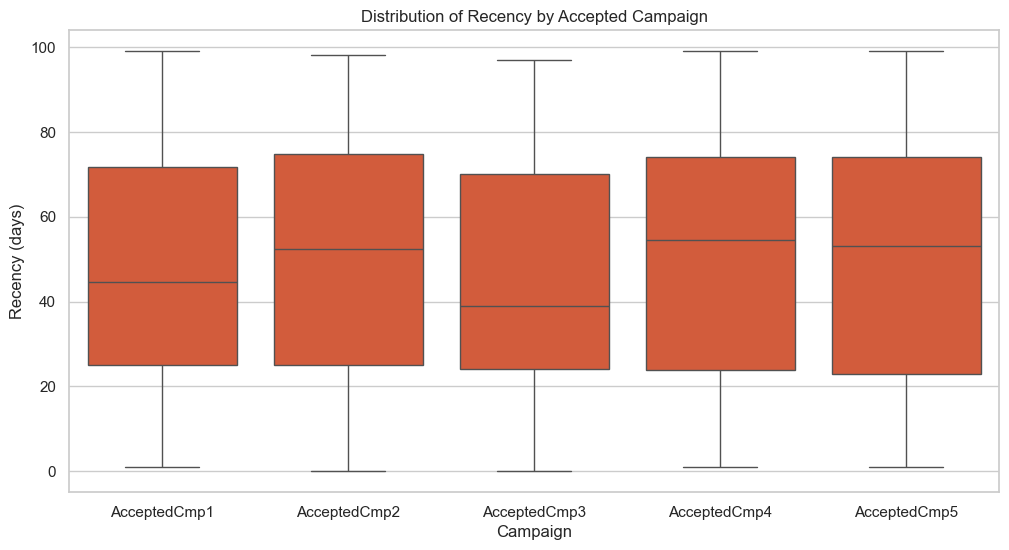

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame to hold recency data for customers who accepted each campaign
recency_data = []

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for campaign in campaigns:
    # Selecting customers who accepted the campaign
    temp = cleaned_df[cleaned_df[campaign] == 1][['Recency']].copy()
    temp['Campaign'] = campaign  # Add a column to label the campaign
    recency_data.append(temp)

# Concatenate all the data into a single DataFrame
recency_data_df = pd.concat(recency_data)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Campaign', y='Recency', data=recency_data_df, color="#EB4E23")
plt.title('Distribution of Recency by Accepted Campaign')
plt.xlabel('Campaign')
plt.ylabel('Recency (days)')
plt.show()


## Correlation Campaign1

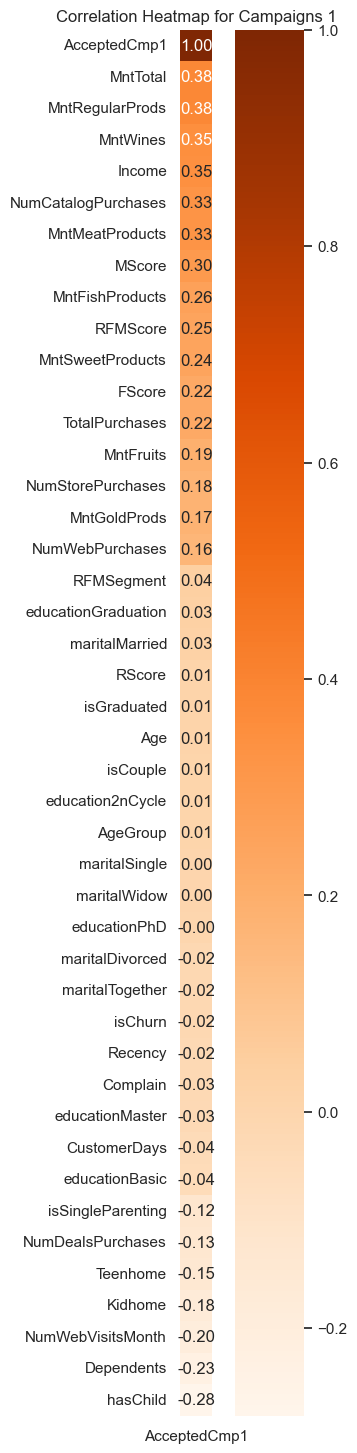

In [32]:
data_corr = cleaned_df.drop(columns=["IncomeGroup", "Education", "MaritalStatus", "PreferredChannel",'AcceptedCmpOverall', 'AcceptedCmp2'
              , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'ZCostContact', 'ZRevenue', "SpenderGroup", "is_accepted"]).corr()
column_corr = data_corr.loc['AcceptedCmp1']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='Oranges', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for Campaigns 1')
# Display the heatmap
plt.show()

## Correlation Campaign2

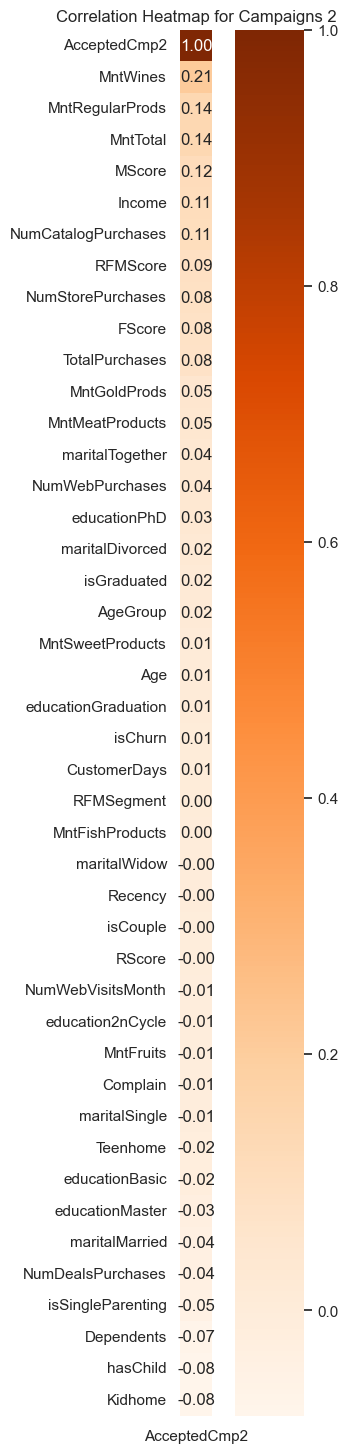

In [33]:
data_corr = cleaned_df.drop(columns=["IncomeGroup", "Education", "MaritalStatus", "PreferredChannel",'AcceptedCmpOverall', 'AcceptedCmp1'
              , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'ZCostContact', 'ZRevenue', "SpenderGroup", "is_accepted"]).corr()
column_corr = data_corr.loc['AcceptedCmp2']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='Oranges', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for Campaigns 2')
# Display the heatmap
plt.show()

## Correlation Campaign3

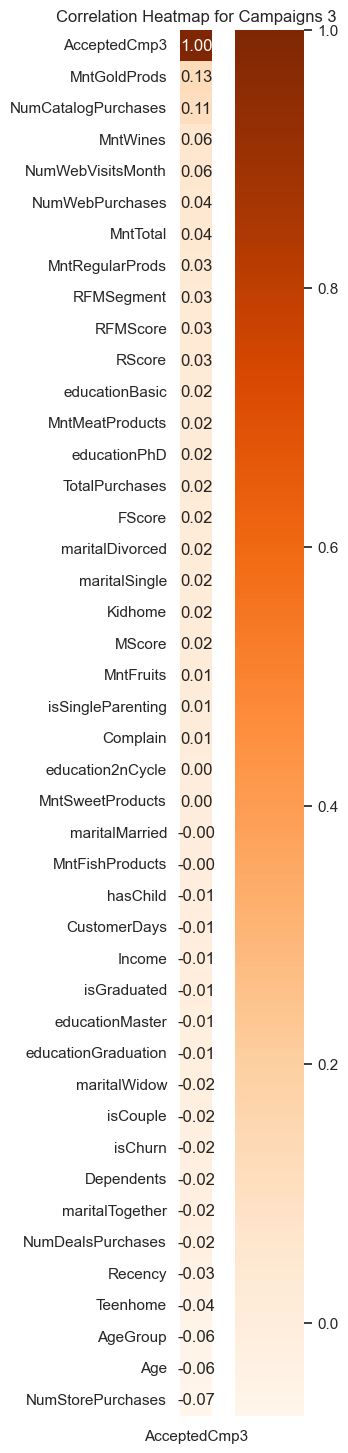

In [34]:
data_corr = cleaned_df.drop(columns=["IncomeGroup", "Education", "MaritalStatus", "PreferredChannel",'AcceptedCmpOverall', 'AcceptedCmp2'
              , 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'ZCostContact', 'ZRevenue', "SpenderGroup", "is_accepted"]).corr()
column_corr = data_corr.loc['AcceptedCmp3']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='Oranges', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for Campaigns 3')
# Display the heatmap
plt.show()

## Correlation Campaign4

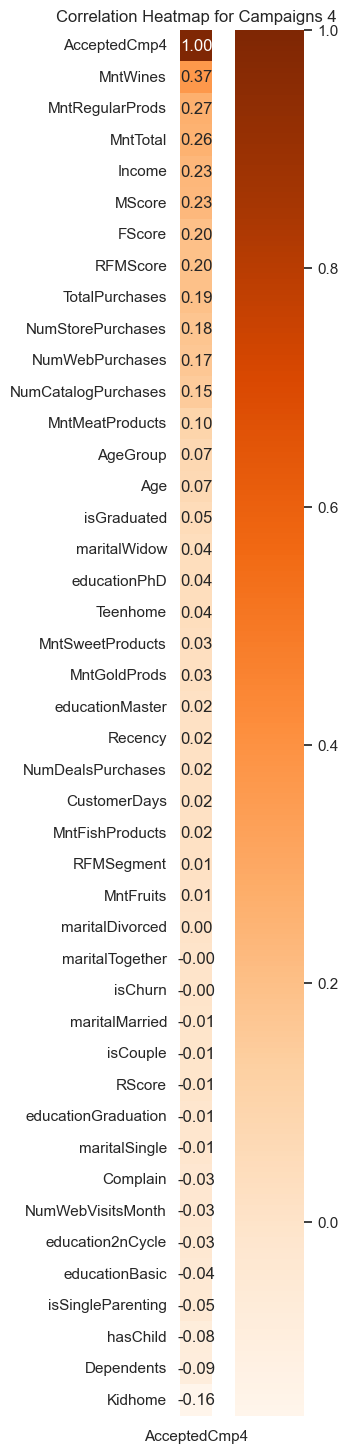

In [35]:
data_corr = cleaned_df.drop(columns=["IncomeGroup", "Education", "MaritalStatus", "PreferredChannel",'AcceptedCmpOverall', 'AcceptedCmp2'
              , 'AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp5', 'Response', 'ZCostContact', 'ZRevenue', "SpenderGroup", "is_accepted"]).corr()
column_corr = data_corr.loc['AcceptedCmp4']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='Oranges', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for Campaigns 4')
# Display the heatmap
plt.show()

## Correlation Campaign5

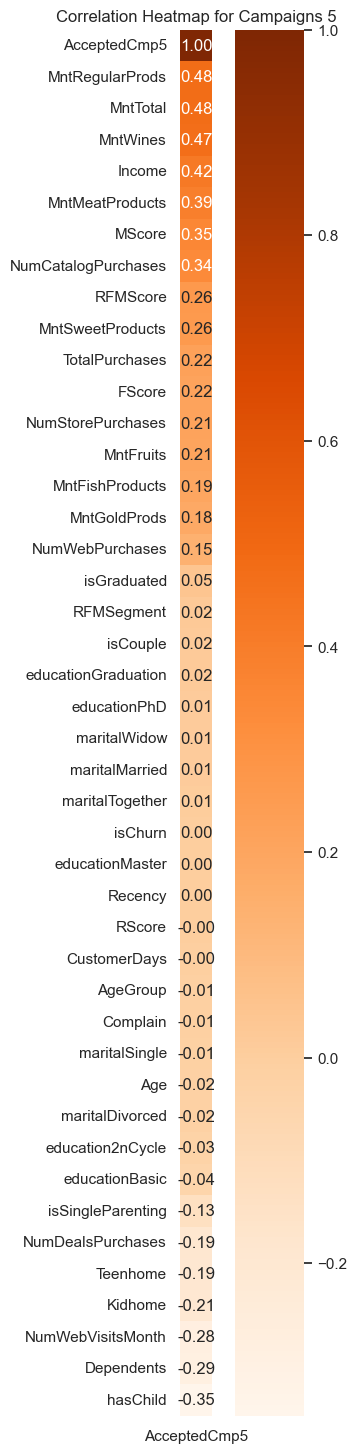

In [36]:
data_corr = cleaned_df.drop(columns=["IncomeGroup", "Education", "MaritalStatus", "PreferredChannel",'AcceptedCmpOverall', 'AcceptedCmp2'
              , 'AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp4', 'Response', 'ZCostContact', 'ZRevenue', "SpenderGroup", "is_accepted"]).corr()
column_corr = data_corr.loc['AcceptedCmp5']
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)), annot=True, cmap='Oranges', cbar=True,square=True,fmt='.2f')
# Set the title 
plt.title('Correlation Heatmap for Campaigns 5')
# Display the heatmap
plt.show()